In [25]:
from transformers import AutoTokenizer, GPT2Model, GPT2LMHeadModel
import torch
from torch.nn.functional import softmax

In [14]:
tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = GPT2LMHeadModel.from_pretrained("openai-community/gpt2")

generation_config.json: 100%|██████████| 124/124 [00:00<00:00, 30.5kB/s]


In [69]:
inputs = tokenizer("good", return_tensors="pt")
outputs = model(**inputs, labels=inputs["input_ids"])

good_token = tokenizer("good", return_tensors="pt")
morning_token = tokenizer("morning", return_tensors="pt")

In [70]:
morning_token

{'input_ids': tensor([[43911]]), 'attention_mask': tensor([[1]])}

In [71]:
probs = softmax(outputs.logits, dim=-1)

In [72]:
probs[:, :, 43911]

tensor([[4.5395e-06]], grad_fn=<SelectBackward0>)

In [68]:
(1.0319*10**(-5))*(4.783*10**(-6))/(5.70378*10**(-5))

8.653169827728279e-07

In [3]:
import random
import seaborn as sns

In [5]:
def simulate():
    p_0 = 100
    p_list = [p_0]
    n = 1000

    for i in range(n):
        p_i = p_list[i]
        if random.choice([0, 1]) == 0:
            p_next = p_i*0.99
        else:
            p_next = p_i*1.01
        p_list.append(p_next)
    return p_list

In [6]:
simulate_list = []
for i in range(10):
    simulate_list.append(simulate())

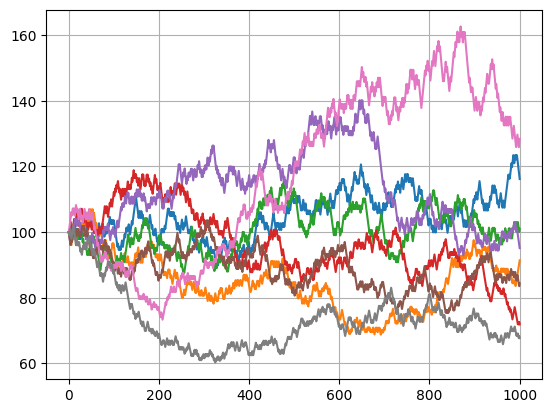

In [13]:
sns.lineplot(x=range(1001), y=simulate_list[0])
sns.lineplot(x=range(1001), y=simulate_list[1])
sns.lineplot(x=range(1001), y=simulate_list[2])
sns.lineplot(x=range(1001), y=simulate_list[3])
sns.lineplot(x=range(1001), y=simulate_list[4])
sns.lineplot(x=range(1001), y=simulate_list[5])
sns.lineplot(x=range(1001), y=simulate_list[6])
ax = sns.lineplot(x=range(1001), y=simulate_list[7])
ax.grid(True)